
ЛАБОРАТОРНАЯ РАБОТА 10. ПОЛИНОМИАЛЬНАЯ
РЕГРЕССИЯ
Цели и задачи
Цель лабораторной работы: научиться применять разработанный пайплайн для тиражирования кода с целью решения задачи полиномиальной
регрессии.
Основные задачи:

- получение навыков рефакторинга кода в проектах машинного обучения
- изучение поведения модели полиномиальной регрессии при
изменении степени полинома;
- освоение модификаций KNN-метода.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:

data = pd.read_csv('bodyfat.csv')
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
# Определение признаков (например, Density) и целевой переменной (BodyFat)
X = data[['Weight']].values  # Обучающие признаки
y = data['BodyFat'].values  # Целевая переменная

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Словарь для хранения результатов
results = {
    'Degree': [],
    'Train MSE': [],
    'Test MSE': []
}

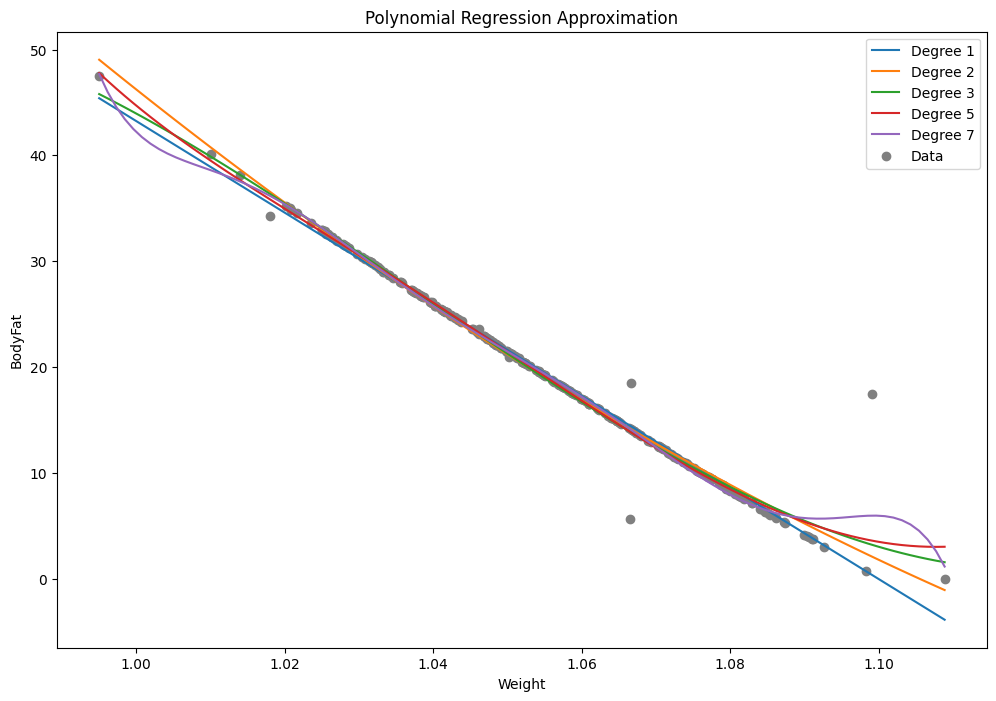

In [ ]:
# Построение моделей для разных степеней полинома
degrees = [1, 2, 3, 5, 7]
plt.figure(figsize=(12, 8))

for degree in degrees:
    # Преобразование признаков в полиномиальные
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Обучение модели линейной регрессии
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Предсказания
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Вычисление MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Сохранение результатов
    results['Degree'].append(degree)
    results['Train MSE'].append(train_mse)
    results['Test MSE'].append(test_mse)

    # Построение графика аппроксимации
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_plot = model.predict(poly.transform(X_plot))
    plt.plot(X_plot, y_plot, label=f'Degree {degree}')

# Визуализация результатов
plt.scatter(X, y, color='gray', label='Data')
plt.title('Polynomial Regression Approximation')
plt.xlabel('Weight')
plt.ylabel('BodyFat')
plt.legend()
plt.show()

Степень 1 подходит для линейных зависимостей, но она может быть слишком простой для этой задачи.
Степень 5 даёт наилучший баланс между обучающей и тестовой ошибкой. Модель достаточно сложная, чтобы улавливать нелинейные зависимости, но не настолько сложная, чтобы переобучиться.


In [ ]:
# Вывод результатов
results_df = pd.DataFrame(results)
print(results_df)

   Degree  Train MSE  Test MSE
0       1   2.108134  0.072038
1       2   1.800392  0.108407
2       3   1.653839  0.120636
3       5   1.588915  0.086253
4       7   1.430651  0.124722


Вывод:
Train MSE (Mean Squared Error на обучающей выборке):
Показывает, насколько хорошо модель описывает данные, на которых она обучалась.
Чем меньше значение Train MSE, тем лучше модель приближается к обучающим данным.
Test MSE (Mean Squared Error на тестовой выборке):
Показывает, насколько хорошо модель способна обобщать и предсказывать данные, которые она не видела раньше.
Низкий Test MSE означает, что модель хорошо предсказывает новые данные, а высокий — что модель может переобучаться или быть недообученной.
Оптимальная степень полинома для данного набора данных находится в диапазоне 1–5. Лучшая комбинация Train и Test MSE наблюдается на степени 5 (Train MSE = 1.588, Test MSE = 0.086).
Увеличение степени полинома после 5 приводит к переобучению: модель начинает слишком "подстраиваться" под данные обучения, теряя способность к обобщению.
Линейная регрессия (степень 1) — самый простой вариант, но она может упустить сложные зависимости в данных.